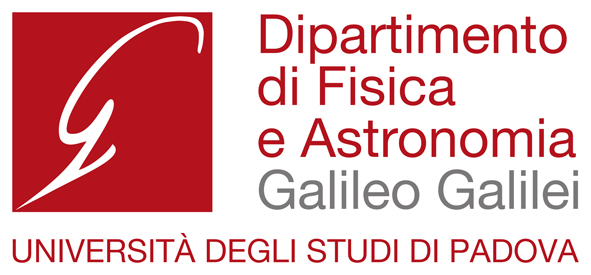

# **`Information Theory and Computation`**
## Quantum Fourier Transform





Accomplished by Ali Bavarchee

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install qiskit

In [ ]:
%load_ext rpy2.ipython

R liberaries and packages

In [ ]:
%%R
devtools::install_github ("HISKP-LQCD/qsimulatR")

In [ ]:
%%R
devtools::install_github ("luca-scr/GA")

In [ ]:
%%R
library(qsimulatR)
library(GA)

In [ ]:
%%R
sessionInfo()

Python libraries and packages

In [ ]:
import numpy as np
pi = np.pi
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector
#import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import qiskit.visualization
from qiskit.visualization import plot_state_qsphere
import qiskit.circuit.library
from qiskit.circuit.library import QFT
#import pennylane

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from qiskit.visualization import plot_bloch_multivector

Fortran f2py
fortranmagic 
Fortran Magical cell

In [ ]:
!pip install -U fortran-magic

In [ ]:
import fortran

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import scipy.fftpack as sf
import scipy.linalg as sl
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext fortranmagic

In [ ]:
%install_ext https://raw.github.com/mgaitan/fortran_magic/master/fortranmagic.py

# Prelude - The Fourier Transform:
Mathematically the Fourier transform converts a function to a series of sinusoidal functions and by considering Euler formula the transformed function turns out as the exponential function. The integral form of the FT defines as:

$$ \hat{f}(\tilde{x}) = \int_{-\infty}^{\infty} f(x) \exp(-2\pi i x\tilde{x}) dx $$ which means  ${f}({x})$ is transfored to ${f}(\tilde{x})$ f $ {\displaystyle f(x)\ {\stackrel {\mathcal {F}}{\longleftrightarrow }}\ {\hat {f}}(\tilde{x})}.$

In the Signal Processing aspect, FT decomposes the magnitude components of given signal to phase components. But in the Digital Signal Processing, the signals are in the not continuous sequences. Hence the discrete Fourier Transform could be exploited to map the time/soace basis of the signal(time, space, etc...) to phase domain basis. 
$$
 \tilde{x}_{n} =\sum _{k=0}^{N-1}x_{k} \exp(\frac{-2\pi i nk}{N}) 
$$



## Introduction to Quantum Fourier Transform:
### Qubit:
Synoptically, Quantum Information (QI) and Quantum Computing(QC) need the Quantum Algorithm(QA), and QA  applies the Quantum Circuit. The Quantum Circuit is fed by quantum bits(qubits) which like as their classical version of them, are the basic elements of QI. Rigorously, the single qubit is a quantum state of a system which based on Dirac notation could be either |0> or |1> as the pure states and the linear combination of these to qubits call superposition.

$$
|0> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}\dots  and \dots |1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$
and for superposition:
$$
|Ψ> =  \alpha|0> + \beta|1>) = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}
$$
The expected value of zero, one and Ψ is:
$$
<0|Ψ> = \alpha
$$
and 
$$
<1|Ψ> = \beta
$$
and the sum of expected value of all states should be preserved to norm 1.
$$
<Ψ> = || \alpha^2|| + ||\beta^2|| = 1
$$

As we are in the quantum mechanics domain, therefore quantum postulates govern all the discussions and concepts which means that computational basis states or single qubits should be orthogonal and also quantum logical gates should be reversible. On the other words, the operators which represent gates should be Unitarian and these gates could be represented by unitary matrices:
$$
\widehat{U}^{\dagger} = \widehat{U}^{-1} \dots  and \dots \widehat{U}^{\dagger}\widehat{U} = \widehat{U}\widehat{U}^{\dagger} = I 
$$ &
$$
det(\widehat{U}) = 1
$$
To visualise the single qubits, one could use Bloch sphere, while for the multiple qubits case, the Q sphere are used.

### Bloch Sphere examples

In [ ]:
plot_bloch_vector([0,0,1], title="Bloch Sphere for |0>")

In [ ]:
plot_bloch_vector([0,0,-1], title="Bloch Sphere for |1> state")

In [ ]:
plot_bloch_vector([1,0,0], title="Bloch Sphere for |+> state")

In [ ]:
plot_bloch_vector([-1,0,0], title="Bloch Sphere for |+> state")

### Demonstration |0> and |1> state and superposition state by Q-Sphere

In [ ]:
n = 1 
qcir = QuantumCircuit(n)
statbaiz = Statevector.from_instruction(qcir).data
print(statbaiz)
display(qcir.draw())
plot_state_qsphere(statbaiz)

In [ ]:
n = 1 
qcir = QuantumCircuit(n)
qcir.x(0)
statbaiz = Statevector.from_instruction(qcir).data
print(statbaiz)
display(qcir.draw())
plot_state_qsphere(statbaiz)

In [ ]:
n = 2 
qcir = QuantumCircuit(n)
qcir.h(0)
statbaiz = Statevector.from_instruction(qcir).data
print(statbaiz)
display(qcir.draw())
plot_state_qsphere(statbaiz)

In [ ]:
n = 6
qcir = QuantumCircuit(n)
qcir.z(3)
statbaiz = Statevector.from_instruction(qcir).data
print(statbaiz)
display(qcir.draw())
plot_state_qsphere(statbaiz)


### Quantum circuit:
Circuit model of a quantum computation contains a sequence of blinding bloks that carry out the computations called quantum gates that already have been introduced before.

## QFT and Quantum Algorithms:

Quantum Fourier Transform (QFT) mathematically is a DFT with a difference in entrance sequences with are combination of quantum basis states so called superposition. The duty of QFT is the changing the basis state from computational to Fourier basis. For n-qubits, number of the states is equal $N = 2^n$

$$
 |\tilde{x}_{n}\rangle = QFT|x_n\rangle = \frac{1}{\sqrt{N}}\sum _{y=0}^{N-1} \exp(\frac{-2\pi i x_ny_{k}}{N})|y_{k}\rangle
$$
which $|x>$'s are all possible states of qubits: $$ |x\rangle =|x_{1}x_{2}\ldots x_{n}\rangle =|x_{1}\rangle \otimes |x_{2}\rangle \otimes \cdots \otimes |x_{n}\rangle $$ Therefore: $$ QFT|x_n\rangle = \frac{1}{\sqrt{N}}\sum _{y=0}^{N-1}\prod_{k=1}^{n} \exp(\frac{-2\pi i x_ny_{k}}{N})|x_{1}x_{2}\ldots x_{n}\rangle =|y_{1}\rangle \otimes |y_{2}\rangle \otimes \cdots \otimes |y_{n}\rangle = |y_{1} y_{2} \cdots y_{n}\rangle
$$
Hence one could rewrite QFT fourmula as $${\displaystyle {\text{QFT}}|x_{1}x_{2}\ldots x_{n}\rangle={\frac {1}{\sqrt {2^n}}}\ \left(|0\rangle +e^{\frac{2\pi ix}{2^1}}|1\rangle \right)\otimes \left(|0\rangle +e^{\frac{2\pi ix}{2^2}}|1\rangle \right)\otimes \cdots \otimes \left(|0\rangle +e^{\frac{2\pi ix}{2^n}}|1\rangle \right).}$$
The importance of QFT is in the usage of the well-known quantum algorithm named Shor's algorithm. This algorithm is very effective and much more faster (O(n2log(log(n)))) than classical version in the factoring problems.

In fact, by using the inverse QFT that called quantum phase estimation (QPE), the computations (in this case finding prime elements of a number or finding the period of a function) could be speed up.


## Ingredients for designing a quantum circuit that applies QFT:

Same as classical version of computation, there are a list of logical gates. But to implement QFT, and based on expanded formula of QFT, installing these logical gates are required:

1. Hadamard gate: 
Hadamard gate as the one of the important and useful quantum gates, is the single qubit operation that could be defined as a 90º rotation around the Y-axis, followed by a 180º rotation around the X-axis.  $$ H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\ 1 & -1 \end{pmatrix} = \frac{1}{\sqrt{2}}(|0><0| + |0><1| + |1><0| - |1><1|)$$ And its performance on different basis is $$ i) H|0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1  \end{pmatrix} = |+> \leftrightarrow H|+> = |0>$$ $$ii) H|1> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1  \end{pmatrix} = |->\leftrightarrow H|-> = |1>$$
2.UROT gate: 
Unitary rotation gate(UROT) for single qubit is defined as $$ UROT_{k} =  \begin{pmatrix} 1 & 0\\ 0 & e^{\frac{2\pi i}{2^k}} \end{pmatrix} $$ And $$ UROT_{k}|x_{j}> = \exp(\frac{2\pi i x_j}{2^k})|x_{j}> $$

# Schematic QFT circuit for single-qubit:

## Implimenting QFT to a Q-Circuit

### R code

In [ ]:
#UROT function is represent the unitary rotarion operation
UROT <- function(bit, i, sign=+1) {
type <- paste0("UROT", i)
if(sign < 0) {
 type <- paste0("UROT", i, "dag")
}
return(methods::new("sqgate", bit=as.integer(bit), M=array(as.complex(c(1,0,0,exp(sign*2*pi*1i/2^i))), dim=c(2,2)), type=type))}

In [ ]:
R_QFT <- function(RQcirc, inverse=FALSE) { 
  nqubitz <- RQcirc@nbits
  R_QFTT <- RQcirc    # RQcirc is our defined quantum cicuit
  sign <- +1 # the sign indicates whether QFT or reverse QFT
  if(inverse) sign <- -1
  for(qbit in c(nqubitz:1)) {
    R_QFTT <- H(qbit) * R_QFTT    #performing Hadamard for each qubit using qsimulatR library
    if(qbit > 1) {
      for(i in c((qbit-1):1)) {
        R_QFTT <- cqgate(bits=c(i, qbit), gate=UROT(qbit, qbit-(i-1), sign=sign)) * R_QFTT #UROT gate is performed and QFT is extracted
      }
    }
  }
  #for(k in c(1:floor(nqubitz/2))) {
   # R_QFTT <- SWAP(c(k, nqubitz-(k-1))) * R_QFTT
  #}
  return(invisible(R_QFTT))
}

In [ ]:
print("For 3-qubit case:")
N <- 3
v <- seq(1:2^N)
v <- v/sqrt(sum(v^2))
w <- fft(v, inverse=TRUE)/sqrt(length(v))
x <- qstate(N, coefs=as.complex(v))
y <- R_QFT(x, inverse=TRUE) # designing a 3-qubit states cicuit using qsimulatR library
plot(y)

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# Demonstrating 5 deferent circuits from 2-qubit to 5 qubit basis states
for (n in c(seq(2:6))) {
  print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
  cat(n,"-qubit")
  vec <- seq(1:2^n)
  coefff <- vec/sqrt(sum(vec^2))
  basis <- qstate(n, coefs=as.complex(coefff))
  print("computational basis::")
  print(basis)
  print("############")
  print("Fourier basis::")
  TR_basis <- R_QFT_mod(basis)
  print(TR_basis)
  plot(TR_basis)
  print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
}

In [ ]:
# Investigating the limitation of the function "R_QFT"
print("For 24-qubit case(hard_limit):")
N <- 20
v <- seq(1:2^N)
v <- v/sqrt(sum(v^2))
x <- qstate(N, coefs=as.complex(v))
y <- R_QFT(x)
print(y)
plot(y)

### python code


In [ ]:
# A simple function based of the defenition of QFT by using Qiskit "QuantumCircuit" and h(Hadamard) and cu1(Rotation) gates
def Q_FT(n_qbits):
  Circutt = QuantumCircuit(n_qbits)
  for nqbit in range(n_qbits):
    Circutt.h(nqbit)
    for statz in range(nqbit + 1, n_qbits):
      Circutt.cu1(pi / (2**(statz - nqbit)), statz, nqbit)
    
  return Circutt


In [ ]:
# visualizing QFT for 1 to 5 qubits:

for i in range(5):
  print("\033[94m\033[1m===================","\033[1m\33[31m",str(i+1),"\033[1m\33[31m-qubit" ,"\033[94m\033[1m===================")
  display(Q_FT(i+1).draw())
  print("/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")


In [ ]:
# Bloch Sphere Visualisation of QFT|00> 
state = '00'
qcirc = QuantumCircuit(len(state))
qcirc.initialize(Statevector.from_label(state).data, qcirc.qubits[: : -1])
print("\33[32m/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/", "\33[31mComputational Basis" ,"\33[32m/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")

display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))

print("\33[32m/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/", "\33[31mForier Basis" ,"\33[32m/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")

qcirc.append(Q_FT(len(state)), qcirc.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))

In [ ]:
print("===================qbitz===================")

In [ ]:
for i in range(5):
  print("\033[94m\033[1m===================","\033[1m\33[31m",str(i+1),"\033[1m\33[31m-qubit" ,"\033[94m\033[1m===================")
  display(Q_FT(i+1).draw())
  print("/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")

In [ ]:
for i in range(5):
  print("\033[94m\033[1m===================","\033[1m\33[31m",str(i+1),"\033[1m\33[31m-qubit" ,"\033[94m\033[1m===================")
  qcirc = QuantumCircuit(i+1)
  Qfot = Q_FT(i+1)
  print("/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")

In [ ]:
# Demonstrating the QFT of 5 deferent cicuits and visualizing their computational and Fuorier basis
for n_qubits in range(5):
  states = [format(x, f'0{n_qubits}b') for x in range(2**n_qubits)]
  states.append(states[0])
  for n,state in enumerate(states):
    qcirc = QuantumCircuit(len(state))
    qcirc.initialize(Statevector.from_label(state).data, qcirc.qubits[::-1])
    print("/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")
    print(state, n) 
    # Computational Basis
    print("/\/\/\/\/\/\/\/\/\/\/\",Computational basis","/\/\/\/\/\/\/\/\/\/\/\/\/")
    display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
    print("\033[1m\33[31m===========================================================")
    # Fourier Basis
    print("/\/\/\/\/\/\/\/\/\/\/\",Fourier basis","/\/\/\/\/\/\/\/\/\/\/\/\/")
    qcirc.append(Q_FT(len(state)), qcirc.qubits)
    display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
    print("\033[94m\033[1m===========================================================")

In [ ]:
#For 4-qubits--- schematic of 4-qubit circuit and its comp. basis
print("For 4-qubits")
print("states")
print(states)
print("quantum cicrcuit")
print(qcirc)
print(Q_FT(len(state)))

In [ ]:

n_qubits = 5 #5-qubit
states = [format(x, f'0{n_qubits}b') for x in range(2**n_qubits)]
states.append(states[0])
for n,state in enumerate(states):
  qcirc = QuantumCircuit(len(state))
  qcirc.initialize(Statevector.from_label(state).data, qcirc.qubits[::-1])
  print("\033[95m/\/\/\/\/\/\/\/\/\/\ basis states /\/\/\/\/\/\/\/\/\/\/\/\/\/\033[0m")
  print(state, n) 
    # Computational Basis
  print("/\/\/\/\/\/\/\/\/\/\/\",Computational basis","/\/\/\/\/\/\/\/\/\/\/\/\/\033[0m")
  display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
  print("\033[1m\33[31m===========================================================\033[0m")
  # Fourier Basis
  print("\033[95m/\/\/\/\/\/\/\/\/\/\/\",Fourier basis","/\/\/\/\/\/\/\/\/\/\/\/\/\033[0m")
  qcirc.append(Q_FT(len(state)), qcirc.qubits)
  print(Statevector.from_instruction(qcirc).data)
  display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
  print("\033[94m\033[1m===========================================================\033[0m")

Computational and Fuorier basis states for 4-qubit:

In [ ]:
n_qubits = 4
states = [format(x, f'0{n_qubits}b') for x in range(2**n_qubits)]
states.append(states[0])
for n,state in enumerate(states):
  qcirc = QuantumCircuit(len(state))
  qcirc.initialize(Statevector.from_label(state).data, qcirc.qubits[::-1])
  # Computational Basis
  print("\033[0m\033[95m\033[1m================")
  print("\033[94mComputational Basis")
  print(state, n) 
    
  
  #display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
  print(Statevector.from_instruction(qcirc).data)
  # Fourier Basis
  print("\033[92mFourier basis\033[0m\033[1m")
  qcirc.append(Q_FT(len(state)), qcirc.qubits)
  #display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
  print(Statevector.from_instruction(qcirc).data)
  print("\033[92m================")

Computational and Fuorier basis states for 15-qubit states▶

In [ ]:
n_qubits = 15
states = [format(x, f'0{n_qubits}b') for x in range(2**n_qubits)]
states.append(states[0])
for n,state in enumerate(states):
  qcirc = QuantumCircuit(len(state))
  qcirc.initialize(Statevector.from_label(state).data, qcirc.qubits[::-1])
  # Computational Basis
  print("\033[0m\033[95m\033[1m================")
  print("\033[94mComputational Basis")
  print(state, n) 
    
  
  #display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
  
  # Fourier Basis
  print("\033[92mFourier basis\033[0m\033[1m")
  qcirc.append(Q_FT(len(state)), qcirc.qubits)
  #display(plot_bloch_multivector(Statevector.from_instruction(qcirc).data))
  print(Statevector.from_instruction(qcirc).data)
  print("\033[92m================")

The function "Q_FT" that based on Qiskid QuantumCircuit library could calculate the converted fourier basis states. Namely there is not limitation for number of qubits, but the time of execution is more than R function "R_QFT" using qsimulatR library, while R_QFT is not executable fo more than 20-qubit states(both have been executed by a google colab instance). Therefore, R code handle $2^{20} = 0.131072$ megabits which consumed 8 GB RAM at same amount of execution time, python code accomplished $2^{15}$ but used 4 GB RAM.

## Fortran Code

In [ ]:
%%fortran
subroutine qft(nn,QQFTT)
    implicit none
    REAL, PARAMETER :: Pi = 3.1415927
    complex :: i
    integer, intent(in) :: nn
    REAL :: N
    !integer, dimension(:), allocatable :: k
    ! complex, dimension(:) :: expo
    integer, dimension(2,1) :: bas0 = reshape( (/1,0/), (/ 2,1/))
    integer, dimension(2,1) :: bas1 = reshape( (/0,1/), (/ 2,1/))
    !complex, dimension(2,2) :: had1 = sqrt(2.)*reshape( (/1,1,1,-1/), (/ 2,2/))
    complex, dimension(2,1),intent(out) :: QQFTT
    !integer, dimension(:,:) :: swap = reshape( (/1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1/), (/ 4,4/))
    ! complex, dimension(2,2) :: rot = reshape( (/1,0,0,expo/), (/ 2,2/))
    i = (0.0, 1.0)
    !nn = 2
    N = (2.)**nn
    !k = (/ (ii, ii=1,nn) /)
    QQFTT = (1/sqrt(N))*(bas0 + (exp((2*Pi*i)/(2**1))*bas1))*(bas0 + (exp((2*Pi*i)/(2**2))*bas1))
                         
    !expo = (/ (exp((2*Pi*i)/(N)), ii=1,nn) /)
    print*, "QFT ==>"
    print*, QQFTT
end subroutine qft

In [ ]:
qft(2)

Obviosly the above fortran code is not correctly implement the QFT for 2-qubit states. The product of two parentheses should not be normal product but kronecker(tensor) product.

The following code is hiring a moudule which performing tensor product to extracting the Fuorier basis of 4-qubit.

In [ ]:
%%fortran
      MODULE QFTmodd	!A rather small collection.
       CONTAINS		!For the specific problem only.
        SUBROUTINE KPRODUCT(A,B,AB)	!AB = Kronecker product of A and B, both two-dimensional arrays.


         integer A(:,:),B(:,:)		!Two-dimensional arrays, lower bound one.
         integer, ALLOCATABLE:: AB(:,:)	!To be created to fit.
         integer R,RA,RB,C,CA,CB,I	!Assistants.
          RA = UBOUND(A,DIM = 1)	!Ascertain the upper bounds of the incoming arrays.
          CA = UBOUND(A,DIM = 2)	!Their lower bounds will be deemed one,
          RB = UBOUND(B,DIM = 1)	!And the upper bound as reported will correspond.
          CB = UBOUND(B,DIM = 2)	!UBOUND(A) would give an array of two values, RA and CA, more for higher dimensionality.
          WRITE (6,1) "A",RA,CA,"B",RB,CB,"A.k.B",RA*RB,CA*CB	!Announce.
    1     FORMAT (3(A," is ",I0,"x",I0,1X))	!Three sets of sizes.
          IF (ALLOCATED(AB)) DEALLOCATE(AB)	!Discard any lingering storage.
          ALLOCATE (AB(RA*RB,CA*CB))		!Obtain the exact desired size.
          R = 0		!Syncopation: start the row offset.
          DO I = 1,RA	!Step down the rows of A.
            C = 0		!For each row, start the column offset.
            DO J = 1,CA		!Step along the columns of A.
              AB(R + 1:R + RB,C + 1:C + CB) = A(I,J)*B	!Place a block of B values.
              C = C + CB		!Advance a block of columns.
            END DO		!On to the next column of A.
            R = R + RB		!Advance a block of rows.
          END DO	!On to the next row of A.
        END SUBROUTINE KPRODUCT	!No tests for bad parameters, or lack of storage...
 
        SUBROUTINE SHOW(F,A)	!Write array A in row,column order.
         INTEGER F	!Output file unit number.
         INTEGER A(:,:)	!The 2-D array, lower bound one.
         INTEGER R	!The row stepper.
          DO R = 1,UBOUND(A,DIM = 1)	!Each row gets its own line.
            WRITE (F,1) A(R,:)		!Write all the columns of that row.
    1       FORMAT (666I3)		!This suffices for the example.
          END DO			!On to the next row.
        END SUBROUTINE SHOW	!WRITE (F,*) A or similar would show A as if transposed.
      END MODULE QFTmodd	!That was simple enough.
 
      PROGRAM QFT44qbit
      USE QFTmodd
      REAL, PARAMETER :: Pi = 3.1415927
      complex :: i
      integer :: nn
      REAL    :: N
      real    :: cof 
      INTEGER :: zero(2,1),one(2,1)
      complex :: coeff1, coeff2, coeff3, coeff4
      
      !integer :: pr1(2,1),pr2(2,1),pr3(2,1),pr4(2,1)
      INTEGER, ALLOCATABLE :: pr1(:,:) ,pr2(:,:) ,pr3(:,:)	!To be created for each tensor product.
      INTEGER, ALLOCATABLE :: pr4(:,:) ,pr5(:,:) ,pr6(:,:)
      INTEGER, ALLOCATABLE :: pr7(:,:) ,pr8(:,:) ,pr9(:,:),pr10(:,:)
      complex, ALLOCATABLE :: stat0(:,:) ,stat1(:,:) ,stat2(:,:),stat3(:,:) ,stat4(:,:)	!To be created for each state.
      complex, ALLOCATABLE :: QFTbas(:,:)
      i = (0.0, 1.0)
      nn = 4
      N = (2.)**nn ! number of all basis states
      cof = 1/sqrt(N)
      
      coeff1 = (exp((2*Pi*i)/(2**1)))+(exp((2*Pi*i)/(2**2)))+(exp((2*Pi*i)/(2**3)))+(exp((2*Pi*i)/(2**4)))
      
      coeff2 = (exp(Pi*i))*((exp(3./2)) + (exp(5./4)) + (exp(9./8)) +(exp(3./4)) +(exp(5./8)) +(exp(3./8)))
      
      coeff3 = (exp(Pi*i))*((exp(7./8)) + (exp(11./8)) + (exp(13./8)) +(exp(14./8)))
      
      coeff4 = exp((15*Pi*i)/(8))

      DATA zero/1, 0/,one/0, 1/
      
      
      CALL KPRODUCT(zero,zero,pr1)
      
      CALL KPRODUCT(pr1,zero,pr2)
      
      CALL KPRODUCT(pr2,zero,pr3)
      
      CALL KPRODUCT(one,one,pr4)
      
      CALL KPRODUCT(pr4,one,pr5)
      
      CALL KPRODUCT(pr5,one,pr6)
      
      CALL KPRODUCT(pr1,pr4,pr7)
      
      CALL KPRODUCT(pr2,one,pr8)
      
      CALL KPRODUCT(zero,pr5,pr9)
      
      
      stat0 = pr3
      
      stat1 = coeff1*pr8
      
      stat2 = coeff2*pr7
      
      stat3 = coeff3*pr9
      
      stat4 = coeff4*pr6
      
      
      QFTbas = (cof)*(stat1 + stat2 + stat3 + stat4)
      
      print*, "----------------------------------------------"
      
      print*, "QFT ==>"
      print*, QFTbas
      
      
      print*, "----------------------------------------------"
      
      END


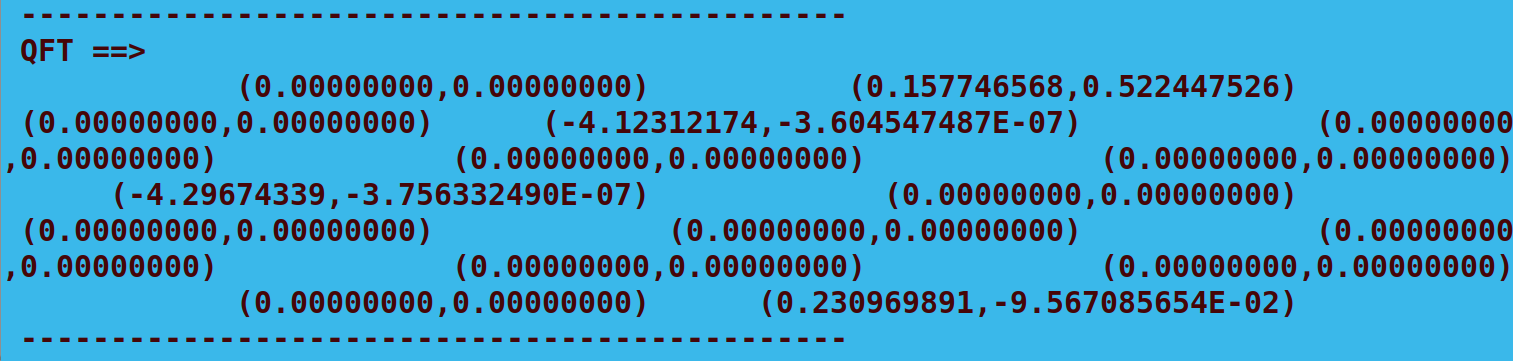

# **Conclusion**
As mentioned before, QFT as a basic tool to implimenting one the most important algorithm called Shore's algorithms plays an outstanding roll in QC. One of the privilege of quantum algorithm than classical algorithms is a something call quantum speed-up which means quantum algorithms could solve the problems much more faster than the classical version. Also QC unlike the classical computers could solve some complex problems. For instance, Shore's algorithm could accomplish factorization task for n-bit integer with $O$($n^2$$log(n)log(log(n)))$ operations while the best classical algorithm called "number field sieve" requires $exp(O(n^{1/3}log^{2/3}n))$ operations. The QFT was implemented by three various language. The execution time of the python code is more than others. The fortran code is very elementry and it should be modified for general case. For instance, it could be develope for mixed states. Also the number of qubits could be insertable but it requared finding a for loop to perform tensor product of the states without manipulation.

### **REFERENCES**:

---



1.   Nielsen, M.A. and Chuang, I., 2002. Quantum computation and quantum information.
2.   https://qiskit.org/documentation/



In [ ]:
%%fortran
module Q_gates
 implicit none
 
 contains

  ! Pauli σ_x (X-gate)
  subroutine PAULIX(sigmax)
  real*8::sigmax(0:1,0:1)
  sigmax(0,:)=(/0,1/)
  sigmax(1,:)=(/1,0/)
  end subroutine PAULIX
   
   
  ! Pauli σ_y (Y-gate)
  subroutine PAULIY(sigmay)
  complex*16::sigmay(0:1,0:1)
  sigmay(0,0)=dcmplx(0,0)
  sigmay(0,1)=dcmplx(0,-1)
  sigmay(1,0)=dcmplx(0,1)
  sigmay(1,1)=dcmplx(0,0)
  end subroutine PAULIY
   
   
  ! Pauli σ_z (Z-gate)
  subroutine PAULIZ(sigmaz)
  real*8::sigmaz(0:1,0:1)
  sigmaz(0,:)=(/1,0/)
  sigmaz(1,:)=(/0,-1/)
  end subroutine PAULIZ
  
  ! HADAMARD (H-gate)
  subroutine HADAMARDG(H)
  real*8::H(0:1,0:1),ele
  ele=1/dsqrt(2.0d0)
  H(0,:)=(/ele,ele/)
  H(1,:)=(/ele,-ele/)
  end subroutine HADAMARDG
   
   
   
  ! Phase gate (S-gate) 
  subroutine PHASEG(S)
  complex*16::S(0:1,0:1)
  S(0,0)=dcmplx(1,0)
  S(0,1)=dcmplx(0,0)
  S(1,0)=dcmplx(0,0)
  S(1,1)=dcmplx(0,1)
  end subroutine PHASEG
  
  ! Rotation (R-gate)
  subroutine ROTG(R,k)
  integer::k
  real*8::pi
  complex*16::R(0:1,0:1),i1,ele
  pi=4*atan(1.0d0)
  i1=dcmplx(0,1)
  ele=exp((2*pi*i1)/(2**k))
  R(0,0)=dcmplx(1,0)
  R(0,1)=dcmplx(0,0)
  R(1,0)=dcmplx(0,0)
  R(1,1)=ele
  end subroutine ROTG
  
  
  ! Controlled-Not X gate (CNOT-gate)
  subroutine CONOTG(A)
  real*8::A(0:3,0:3)
  A(0,:)=(/1,0,0,0/)
  A(1,:)=(/0,1,0,0/)
  A(2,:)=(/0,0,0,1/)
  A(3,:)=(/0,0,1,0/)
  end subroutine CONOTG
  
  
  ! Controlled Z gate
  subroutine COZG(A)
  real*8::A(0:3,0:3)
  A(0,:)=(/1,0,0,0/)
  A(1,:)=(/0,1,0,0/)
  A(2,:)=(/0,0,1,0/)
  A(3,:)=(/0,0,0,-1/)
  end subroutine COZG
  
  
  ! SWAP gate
  subroutine SWAPG(A)
  real*8::A(0:3,0:3)
  A(0,:)=(/1,0,0,0/)
  A(1,:)=(/0,0,1,0/)
  A(2,:)=(/0,1,0,0/)
  A(3,:)=(/0,0,0,1/)
  end subroutine SWAPG
  
end module Q_gates


program example_gates
 use Q_gates
 implicit none
 real*8::sigmax(0:1,0:1)
 complex*16::sigmay(0:1,0:1)
 real*8::sigmaz(0:1,0:1) 
 real*8::H(0:1,0:1)
 complex*16::R(0:1,0:1)
 integer:: i, j
 
 call PAULIX(sigmax)
 call PAULIY(sigmay)
 call PAULIZ(sigmaz)
 call HADAMARDG(H)
 call ROTG(R,2)
 
 print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "X-Gate:"
 
 do j=0,1
  print *, sigmax(j,:)
 end do
 
 
 print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "Y-Gate:"
 
 do i=0,1
  do j=0,1
   print *, sigmay(i,j)
  end do
 end do
 
 
 
 
 print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "Z-Gate:"
 
 do j=0,1
  !write(111,*)int(sigmaz(j,:))
  print * ,int(sigmaz(j,:))
  !write(222,*)H(j,:)
  !print * , "H gate",H(j,:)
 end do
 
print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 
 print* , "H_gate:"
 do j=0,1
  print * ,H(j,:)
 end do
 
print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "Rotation gate:"
 do i=0,1
  do j=0,1
   print*, R(i,j)
  end do
 end do

end program example_gates

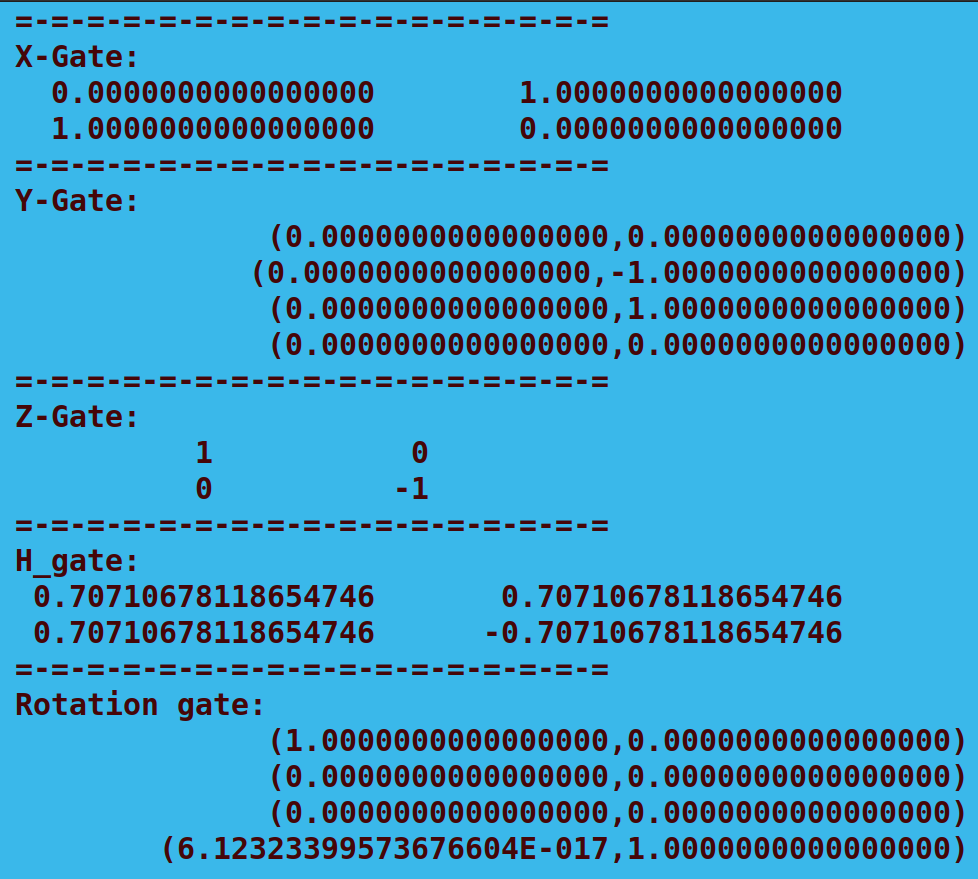

In [ ]:
import numpy.f2py
fsource = '''
      subroutine PAULIZ(sigmaz)
      real*8::sigmaz(0:1,0:1)
      sigmaz(0,:)=(/1,0/)
      sigmaz(1,:)=(/0,-1/)
      end subroutine PAULIZ
 '''
numpy.f2py.compile(fsource, modulename='Zgate')

In [ ]:
import Zgate

In [ ]:
sigmaz= np.array([[1, 0],[0, -1]])

In [ ]:
Zgate.pauliz(sigmaz)

In [ ]:
Z = Zgate.pauliz(sigmaz)

In [ ]:
import numpy.f2py
fsource = '''
      
      subroutine HADAMARDG(H)
      real*8::H(0:1,0:1),ele
      ele=1/dsqrt(2.0d0)
      H(0,:)=(/ele,ele/)
      H(1,:)=(/ele,-ele/)
      end HADAMARDG(H)
  '''
numpy.f2py.compile(fsource, modulename='HGAte')

In [ ]:
import HGAte

In [ ]:
from math import *

In [ ]:
ele =1/sqrt(2)
lel =-1/sqrt(2)
h = np.array([[ele, ele],[ele, lel]])

In [ ]:
h

In [ ]:
HG = HGAte.hadamardg(h)

In [ ]:
display(HG)

In [ ]:
import numpy.f2py
fsource = '''
 implicit none
 
 contains

  ! Pauli σ_x (X-gate)
  subroutine PAULIX(sigmax)
  real*8::sigmax(0:1,0:1)
  sigmax(0,:)=(/0,1/)
  sigmax(1,:)=(/1,0/)
  end subroutine PAULIX
   
   
  ! Pauli σ_y (Y-gate)
  subroutine PAULIY(sigmay)
  complex*16::sigmay(0:1,0:1)
  sigmay(0,0)=dcmplx(0,0)
  sigmay(0,1)=dcmplx(0,-1)
  sigmay(1,0)=dcmplx(0,1)
  sigmay(1,1)=dcmplx(0,0)
  end subroutine PAULIY
   
   
  ! Pauli σ_z (Z-gate)
  subroutine PAULIZ(sigmaz)
  real*8::sigmaz(0:1,0:1)
  sigmaz(0,:)=(/1,0/)
  sigmaz(1,:)=(/0,-1/)
  end subroutine PAULIZ
  
  ! HADAMARD (H-gate)
  subroutine HADAMARDG(H)
  real*8::H(0:1,0:1),ele
  ele=1/dsqrt(2.0d0)
  H(0,:)=(/ele,ele/)
  H(1,:)=(/ele,-ele/)
  end subroutine HADAMARDG
   
   
   
  ! Phase gate (S-gate) 
  subroutine PHASEG(S)
  complex*16::S(0:1,0:1)
  S(0,0)=dcmplx(1,0)
  S(0,1)=dcmplx(0,0)
  S(1,0)=dcmplx(0,0)
  S(1,1)=dcmplx(0,1)
  end subroutine PHASEG
  
  ! Rotation (R-gate)
  subroutine ROTG(R,k)
  integer::k
  real*8::pi
  complex*16::R(0:1,0:1),i1,ele
  pi=4*atan(1.0d0)
  i1=dcmplx(0,1)
  ele=exp((2*pi*i1)/(2**k))
  R(0,0)=dcmplx(1,0)
  R(0,1)=dcmplx(0,0)
  R(1,0)=dcmplx(0,0)
  R(1,1)=ele
  end subroutine ROTG
  
  
  ! Controlled-Not X gate (CNOT-gate)
  subroutine CONOTG(A)
  real*8::A(0:3,0:3)
  A(0,:)=(/1,0,0,0/)
  A(1,:)=(/0,1,0,0/)
  A(2,:)=(/0,0,0,1/)
  A(3,:)=(/0,0,1,0/)
  end subroutine CONOTG
  
  
  ! Controlled Z gate
  subroutine COZG(A)
  real*8::A(0:3,0:3)
  A(0,:)=(/1,0,0,0/)
  A(1,:)=(/0,1,0,0/)
  A(2,:)=(/0,0,1,0/)
  A(3,:)=(/0,0,0,-1/)
  end subroutine COZG
  
  
  ! SWAP gate
  subroutine SWAPG(A)
  real*8::A(0:3,0:3)
  A(0,:)=(/1,0,0,0/)
  A(1,:)=(/0,0,1,0/)
  A(2,:)=(/0,1,0,0/)
  A(3,:)=(/0,0,0,1/)
  end subroutine SWAPG
  


program example_gates
 use Q_gates
 implicit none
 real*8::sigmax(0:1,0:1)
 complex*16::sigmay(0:1,0:1)
 real*8::sigmaz(0:1,0:1) 
 real*8::H(0:1,0:1)
 complex*16::R(0:1,0:1)
 integer:: i, j
 
 call PAULIX(sigmax)
 call PAULIY(sigmay)
 call PAULIZ(sigmaz)
 call HADAMARDG(H)
 call ROTG(R,2)
 
 print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "X-Gate:"
 
 do j=0,1
  print *, sigmax(j,:)
 end do
 
 
 print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "Y-Gate:"
 
 do i=0,1
  do j=0,1
   print *, sigmay(i,j)
  end do
 end do
 
 
 
 
 print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "Z-Gate:"
 
 do j=0,1
  !write(111,*)int(sigmaz(j,:))
  print * ,int(sigmaz(j,:))
  !write(222,*)H(j,:)
  !print * , "H gate",H(j,:)
 end do
 
print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 
 print* , "H_gate:"
 do j=0,1
  print * ,H(j,:)
 end do
 
print* , "=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-="
 print* , "Rotation gate:"
 do i=0,1
  do j=0,1
   print*, R(i,j)
  end do
 end do

end program example_gates
'''
numpy.f2py.compile(fsource, modulename='Q_gates')
